**Note:** This notebook was used to help with data collection and was executed in a server environment different from the other notebooks. It is not intended to be re-run. We merely included it here as a partial record of some of the nitty-gritty details of the data collection process, such as deciding where to resample.

---

In [48]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import csv

### Clean up sampling statistics (correct for over-sampling bug)

In [13]:
connection = sqlite3.connect('/projects/shell-alias-analysis/snapshot-20200102/results.db')
c = connection.cursor()

with open('/projects/shell-alias-analysis/snapshot-20200102/sampling.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader, None)
    for row in reader:
#        if row[3] > row[2]:
            x = c.execute('select count(*) from file where size >= ? and size <= ?', (row[0], row[1]))
            print((row,x.fetchone()))


(['1', '10', '4', '4'], (4,))
(['11', '20', '582', '480'], (427,))
(['21', '30', '3452', '2000'], (2494,))
(['31', '40', '1218', '2000'], (1189,))
(['41', '50', '1522', '2000'], (1409,))
(['51', '60', '2735', '2000'], (1690,))
(['61', '70', '3533', '2000'], (1656,))
(['71', '80', '3478', '2000'], (1656,))
(['81', '90', '3165', '2000'], (1809,))
(['91', '100', '2178', '2000'], (1961,))
(['101', '110', '4397', '2000'], (1455,))
(['111', '120', '1829', '2000'], (1712,))
(['121', '130', '3815', '2000'], (1862,))
(['131', '140', '3791', '1999'], (1710,))
(['141', '150', '2304', '2000'], (1767,))
(['151', '160', '2922', '1999'], (2138,))
(['161', '170', '2632', '2000'], (1803,))
(['171', '180', '1997', '1999'], (1781,))
(['181', '190', '1941', '2000'], (1560,))
(['191', '200', '3858', '2000'], (1741,))
(['201', '210', '3163', '2000'], (1698,))
(['211', '220', '3129', '2000'], (1761,))
(['221', '230', '2744', '2000'], (1703,))
(['231', '240', '2727', '2000'], (1797,))
(['241', '250', '1403', 

KeyboardInterrupt: 

### Figure out where to resample

In [156]:
with open('/projects/shell-alias-analysis/sampling-merged.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader, None)
    for row in reader:
        strat_first = int(row[0])
        strat_last = int(row[1])
        pop = int(row[2])
        sam = int(row[3])
        per = sam/pop
        per_str = '%6.2f%%' % (sam/pop*100)
        if per < 0.8 and sam <= 2000:
            print(f'{strat_first} .. {strat_last} | {pop} | {sam} | {per_str}')
        

1631 .. 1640 | 2689 | 2000 |  74.38%
3051 .. 3060 | 2849 | 2000 |  70.20%
3771 .. 3780 | 2811 | 2000 |  71.15%
19801 .. 19810 | 2590 | 1999 |  77.18%


## Re-scale sampling run with smaller strata

In [8]:
with open('/projects/shell-alias-analysis/sampling-20200108.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader, None)
    while True:
        r1 = next(reader, None)
        if r1 is None:
            break
        strat_first = int(r1[0])
        pop1 = int(r1[2])
        sam1 = int(r1[3])
        r2 = next(reader, None)
        if r2 is None:
            strat_last = int(r1[1])
            pop2 = 0
            sam2 = 0
        else:
            strat_last = int(r2[1])
            pop2 = int(r2[2])
            sam2 = int(r2[3])
        print(f'{strat_first},{strat_last},{pop1+pop2},{sam1+sam2}')
        
        

11,20,739,739
21,30,3448,2613
31,40,1209,1203
41,50,1542,1542
51,60,2729,2600
61,70,3565,2625
71,80,3531,2888
81,90,3176,2774
91,100,2166,2147
101,110,4398,2642
111,120,1834,1811
121,130,3798,3051
131,140,3845,3034
141,150,2339,2339
151,160,2843,2689
161,170,2651,2650
171,180,2080,2048
181,190,1955,1933
191,200,3893,2339
201,210,3269,3189
211,220,3150,3127
221,230,2788,2732
231,240,2767,2696
241,250,1412,1412
251,260,2023,2023
261,270,2234,2235
271,280,2050,2052
281,290,3882,2697
291,300,3924,3705
301,310,3036,2703
311,320,2346,2344
321,330,2980,2980
331,340,9880,2730
341,350,25172,2720
351,360,2361,2361
361,370,2416,2416
371,380,4461,3999
381,390,1538,1538
391,400,3817,2642
401,410,4821,3931
411,420,2971,2725
421,430,4753,4000
431,440,3707,2981
441,450,3716,2908
451,460,2063,2063
461,470,1382,1382
471,480,3831,3478
481,490,2446,2446
491,500,1154,1154
501,510,1429,1429
511,520,2916,2917
521,530,3119,3119
531,540,1509,1509
541,550,2344,2344
551,560,2874,2870
561,570,3282,3282
571,580,23

## Merge sampling runs

In [12]:
with open('/projects/shell-alias-analysis/sampling-20200108-rescaled.csv', 'r') as f1, open('/projects/shell-alias-analysis/sampling-20200102.csv', 'r') as f2:
    reader1 = csv.reader(f1)
    reader2 = csv.reader(f2)
    next(reader1, None)
    next(reader2, None)
    while True:
        r1 = next(reader1, None)
        r2 = next(reader2, None)
        if r1 is None and r2 is None:
            break
        if r1 is None:
            print(f'{r2[0]},{r2[1]},{r2[2]},{r2[3]}')
        elif r2 is None:
            print(f'{r1[0]},{r1[1]},{r1[2]},{r1[3]}')
        elif r1[0] != r2[0] or r1[1] != r2[1]:
            print("error: unequal ranges")
        else:
            strat_first = r1[0]
            strat_last = r1[1]
            pop1 = int(r1[2])
            pop2 = int(r2[2])
            sam1 = int(r1[3])
            sam2 = int(r2[3])
            print(f'{strat_first},{strat_last},{max(pop1,pop2)},{max(sam1,sam2)}')

1,10,4,4
11,20,739,739
21,30,3452,2613
31,40,1218,1203
41,50,1542,1542
51,60,2735,2600
61,70,3565,2625
71,80,3531,2888
81,90,3176,2774
91,100,2178,2147
101,110,4398,2642
111,120,1834,1811
121,130,3815,3051
131,140,3845,3034
141,150,2339,2339
151,160,2922,2689
161,170,2651,2650
171,180,2080,2048
181,190,1955,1933
191,200,3893,2339
201,210,3269,3189
211,220,3150,3127
221,230,2788,2732
231,240,2767,2696
241,250,1412,1412
251,260,2023,2023
261,270,2234,2235
271,280,2050,2052
281,290,3882,2697
291,300,3924,3705
301,310,3036,2703
311,320,2346,2344
321,330,2980,2980
331,340,9880,2730
341,350,25172,2720
351,360,2361,2361
361,370,2416,2416
371,380,4461,3999
381,390,1538,1538
391,400,3817,2642
401,410,4821,3931
411,420,2971,2725
421,430,4753,4000
431,440,3707,2981
441,450,3716,2908
451,460,2068,2063
461,470,1382,1382
471,480,3831,3478
481,490,2446,2446
491,500,1154,1154
501,510,1429,1429
511,520,2916,2917
521,530,3119,3119
531,540,1509,1509
541,550,2349,2344
551,560,2874,2870
561,570,3282,3282
5

## Visualization of sampling rate

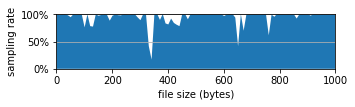

In [267]:
sampop = pd.read_csv('/projects/shell-alias-analysis/sampling-merged-actual.csv', usecols=['stratum_first','population','sample'])
sampop["sampling rate"] = sampop["sample"] / sampop["population"]
sampop.set_index('stratum_first',inplace=True)
chart = sampop["sampling rate"].plot.area(figsize=(5,1),ylim=(0,1),xlim=(0,1000), linewidth=0,)
chart.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))
chart.set_xlabel("file size (bytes)")
chart.set_ylabel("sampling rate")
chart.grid(axis='y')

## Total sampling rate

In [277]:
total_pop = 0
total_sam = 0
with open('/projects/shell-alias-analysis/sampling-merged-actual.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader, None)
    for row in reader:
        strat_first = int(row[0])
        if strat_first >= 29000:
            break
        strat_last = int(row[1])
        pop = int(row[2])
        sam = int(row[3])
        per = sam/pop
        total_pop += pop
        total_sam += sam

total_per_str = '%6.2f%%' % (total_sam/total_pop*100)
print(f'{total_pop} | {total_sam} | {total_per_str}')

897182 | 844140 |  94.09%


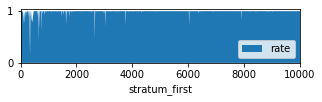

In [241]:
sampop2 = pd.read_csv('/projects/shell-alias-analysis/sampling-merged.csv', usecols=['stratum_first','population','sample'])
sampop2["rate"] = sampop2["sample"] / sampop2["population"]

grid = sampop2.loc[:, ['stratum_first','rate']]
grid.plot.area(x='stratum_first',y='rate',figsize=(5,1),xlim=(0,10000),linewidth=0)


## Notes

#### sampling

- final sampling: 8.2.2020
- final file count: 844140
- repo count: 304361
- files up to and including 29000 bytes


## Calculate final sampling rate

We take the population from the sampling statistics (the max of what we have encountered) and the sample size from the database (what we have actually sampled).
Theoretically, the sample size from the database should correspond with the sample size from the statistics file produced by `github-searcher`, but since the database contains data from multiple runs (and we had a bit of data corruption due to a server crash), the actual number of downloaded files might differ slightly.

In [275]:
connection = sqlite3.connect('/projects/shell-alias-analysis/results_unparsed.db')
c = connection.cursor()

with open('/projects/shell-alias-analysis/sampling-merged.csv', 'r') as f, open('/projects/shell-alias-analysis/sampling-merged-actual.csv', 'w') as f2:
    reader = csv.reader(f)
    writer = csv.writer(f2)
    next(reader, None)
    for row in reader:
        strat_first = int(row[0])
        strat_last = int(row[1])
        pop = int(row[2])
        sam = int(row[3])
        per = sam/pop
        
        (actual_sam,) = c.execute('select count(*) from file where size >= ? and size <= ?', (strat_first, strat_last)).fetchone()
        
#        print(f'{strat_first} .. {strat_last} | {pop} | {sam} | {actual_sam}')
        writer.writerow((strat_first,strat_last,pop,actual_sam))
        
        